In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

<div style="background-color:#b6bfe0; padding:15px">

Intro:  
Accuracy/interpretability tradeoff  
Importance of interpretability + transparency in the light of GDPR

# Used libraries and methods

## ELI5 

#### Feature importance 
#### Permutation importance

## Partial dependence plots (PDP)

## LIME

## SHAP

## SKATER  

</div>

# Exploring the data

## About the dataset
Dataset: https://community.fico.com/s/explainable-machine-learning-challenge

...

In [2]:
df = pd.read_csv('heloc_dataset_v1.csv')

dataset = df.copy()

In [3]:
data_description = pd.read_excel('heloc_data_dictionary-2.xlsx')
print(data_description)

                                       Variable Names  \
0                                     RiskPerformance   
1                                ExternalRiskEstimate   
2                               MSinceOldestTradeOpen   
3                           MSinceMostRecentTradeOpen   
4                                      AverageMInFile   
5                               NumSatisfactoryTrades   
6                         NumTrades60Ever2DerogPubRec   
7                         NumTrades90Ever2DerogPubRec   
8                              PercentTradesNeverDelq   
9                                MSinceMostRecentDelq   
10                           MaxDelq2PublicRecLast12M   
11                                        MaxDelqEver   
12                                     NumTotalTrades   
13                             NumTradesOpeninLast12M   
14                               PercentInstallTrades   
15                       MSinceMostRecentInqexcl7days   
16                             

In [4]:
print(dataset.head(10))

  RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                    55                    144   
1             Bad                    61                     58   
2             Bad                    67                     66   
3             Bad                    66                    169   
4             Bad                    81                    333   
5             Bad                    59                    137   
6            Good                    54                     88   
7            Good                    68                    148   
8             Bad                    59                    324   
9             Bad                    61                     79   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                

In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
RiskPerformance                       10459 non-null object
ExternalRiskEstimate                  10459 non-null int64
MSinceOldestTradeOpen                 10459 non-null int64
MSinceMostRecentTradeOpen             10459 non-null int64
AverageMInFile                        10459 non-null int64
NumSatisfactoryTrades                 10459 non-null int64
NumTrades60Ever2DerogPubRec           10459 non-null int64
NumTrades90Ever2DerogPubRec           10459 non-null int64
PercentTradesNeverDelq                10459 non-null int64
MSinceMostRecentDelq                  10459 non-null int64
MaxDelq2PublicRecLast12M              10459 non-null int64
MaxDelqEver                           10459 non-null int64
NumTotalTrades                        10459 non-null int64
NumTradesOpeninLast12M                10459 non-null int64
PercentInstallTrades                  10459 non-null int64
MSinc

In [6]:
print(dataset.describe())

       ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count          10459.000000           10459.000000               10459.000000   
mean              67.425758             184.205373                   8.543455   
std               21.121621             109.683816                  13.301745   
min               -9.000000              -9.000000                  -9.000000   
25%               63.000000             118.000000                   3.000000   
50%               71.000000             178.000000                   5.000000   
75%               79.000000             249.500000                  11.000000   
max               94.000000             803.000000                 383.000000   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count    10459.000000           10459.000000                 10459.000000   
mean        73.843293              19.428052                     0.042738   
std         38.782803              13.0

<div style='background-color:#e0dab6; padding:20px'>

# Training and evaluating the models  
(Contest winners achieved accuraties of ~74% with complex models)

</div>

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf

In [8]:
#Preparing the data

target = 'RiskPerformance'

df = pd.read_csv('heloc_dataset_v1.csv')
y = (df[target] == 'Bad').astype(int)
X = df.drop(target, axis=1)
feature_names = X.columns
feature_names = [feature + ": " + str(idx+1) for idx, feature in enumerate(feature_names)]

print('Percentage of "Bad" target values: ' + str(sum(y)/len(y)))

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33, random_state=42)
X_test_smaller = X_test[:150]

X_train_norm = tf.keras.utils.normalize(X_train, axis=1)
X_test_norm = tf.keras.utils.normalize(X_test, axis=1)

Percentage of "Bad" target values: 0.5219428243617936


Features are ready to use - there is no rish of data leakage.  
Data is balanced, accuracy will be used as model evaluation metric.

### Linear regression - interpretable model.

In [9]:
# Without normalization

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 42, solver='lbfgs', max_iter = 2000).fit(X_train, y_train)

log_predictions = log_model.predict(X_test)

print(confusion_matrix(y_test, log_predictions))
print(classification_report(y_test, log_predictions))

[[1071  562]
 [ 450 1369]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1633
           1       0.71      0.75      0.73      1819

   micro avg       0.71      0.71      0.71      3452
   macro avg       0.71      0.70      0.70      3452
weighted avg       0.71      0.71      0.71      3452



In [10]:
# With normalization

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 42, solver='lbfgs', max_iter = 2000).fit(X_train_norm, y_train)

log_predictions_norm = log_model.predict(X_test_norm)

print(confusion_matrix(y_test, log_predictions))
print(classification_report(y_test, log_predictions))

[[1071  562]
 [ 450 1369]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1633
           1       0.71      0.75      0.73      1819

   micro avg       0.71      0.71      0.71      3452
   macro avg       0.71      0.70      0.70      3452
weighted avg       0.71      0.71      0.71      3452



### Random forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Without normalization

tree_model = RandomForestClassifier(n_estimators = 30, random_state=1).fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

print(confusion_matrix(y_test, tree_predictions))
print(classification_report(y_test, tree_predictions))

[[1068  565]
 [ 428 1391]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68      1633
           1       0.71      0.76      0.74      1819

   micro avg       0.71      0.71      0.71      3452
   macro avg       0.71      0.71      0.71      3452
weighted avg       0.71      0.71      0.71      3452



In [13]:
#With normalization

forest_model = RandomForestClassifier(n_estimators = 30, random_state=1).fit(X_train_norm, y_train)
forest_predictions_norm = tree_model.predict(X_test_norm)

print(confusion_matrix(y_test, tree_predictions))
print(classification_report(y_test, tree_predictions))

[[1068  565]
 [ 428 1391]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68      1633
           1       0.71      0.76      0.74      1819

   micro avg       0.71      0.71      0.71      3452
   macro avg       0.71      0.71      0.71      3452
weighted avg       0.71      0.71      0.71      3452



### Neural Network

In [14]:
# Without normalization

nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(12, activation=tf.nn.relu, input_shape=X_train.shape[1:]))
nn_model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

nn_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']);

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [15]:
nn_model.fit(X_train, y_train, batch_size=32, epochs=15);

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
7007/7007 [==============================] - 2s 264us/sample - loss: 7.8934 - acc: 0.4868
Epoch 2/15
7007/7007 [==============================] - 1s 101us/sample - loss: 7.8912 - acc: 0.4887
Epoch 3/15
7007/7007 [==============================] - 1s 97us/sample - loss: 7.8915 - acc: 0.4861
Epoch 4/15
7007/7007 [==============================] - 1s 89us/sample - loss: 7.8911 - acc: 0.4888
Epoch 5/15
7007/7007 [==============================] - 1s 93us/sample - loss: 7.8917 - acc: 0.4877
Epoch 6/15
7007/7007 [==============================] - 1s 126us/sample - loss: 7.8911 - acc: 0.4891
Epoch 7/15
7007/7007 [==============================] - 1s 140us/sample - loss: 7.8913 - acc: 0.4889
Epoch 8/15
7007/7007 [==============================] - 1s 104us/sample - loss: 7.8912 - acc: 0.4895
Epoch 9/15
7007/7007 [==============================] - 1s 91us/sample - loss: 7.8915 - acc: 0.4888
Epoch 10/15
7007/7007 [========================

In [16]:
nn_loss, nn_acc = nn_model.evaluate(X_test, y_test)
print('Loss: ' + str(nn_loss))
print(nn_acc)

#PREDICTIONS - probability of bad risk performance

nn_predictions = nn_model.predict(X_test)
nn_predictions = [1 if pred >= 0.5 else 0 for pred in nn_predictions]

nn_matches = [1 if i == j else 0 for i, j in zip(nn_predictions, y_test)] # Matches calculated for later usage
nn_accuracy = sum(nn_matches)/len(nn_matches)
print('Accuracy: ' + str(nn_accuracy))

3452/3452 [==============================] - 1s 145us/sample - loss: 8.0834 - acc: 0.4710
Loss: 8.083397905077884
0.47103128
Accuracy: 0.47103128621089224


In [17]:
# With normalization

nn_model_norm = tf.keras.models.Sequential()
nn_model_norm.add(tf.keras.layers.Dense(12, activation=tf.nn.relu, input_shape=X_train.shape[1:]))
nn_model_norm.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

nn_model_norm.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']);

In [18]:
nn_model_norm.fit(X_train_norm, y_train, batch_size=32, epochs=15);

Epoch 1/15
7007/7007 [==============================] - 2s 250us/sample - loss: 0.6713 - acc: 0.6264
Epoch 2/15
7007/7007 [==============================] - 1s 95us/sample - loss: 0.6456 - acc: 0.6569
Epoch 3/15
7007/7007 [==============================] - 1s 94us/sample - loss: 0.6267 - acc: 0.6636
Epoch 4/15
7007/7007 [==============================] - 1s 87us/sample - loss: 0.6140 - acc: 0.6710
Epoch 5/15
7007/7007 [==============================] - 1s 97us/sample - loss: 0.6063 - acc: 0.6772
Epoch 6/15
7007/7007 [==============================] - 1s 94us/sample - loss: 0.6014 - acc: 0.6763
Epoch 7/15
7007/7007 [==============================] - 1s 86us/sample - loss: 0.5980 - acc: 0.6816
Epoch 8/15
7007/7007 [==============================] - 1s 86us/sample - loss: 0.5961 - acc: 0.6837
Epoch 9/15
7007/7007 [==============================] - 1s 87us/sample - loss: 0.5936 - acc: 0.6886
Epoch 10/15
7007/7007 [==============================] - 1s 86us/sample - loss: 0.5921 - acc: 0.690

In [19]:
nn_loss_norm, nn_acc_norm = nn_model_norm.evaluate(X_test_norm, y_test)
print('Loss: ' + str(nn_loss_norm))
print(nn_acc_norm)

#PREDICTIONS - probability of bad risk performance

nn_predictions_norm = nn_model_norm.predict(X_test_norm)
nn_predictions_norm = [1 if pred >= 0.5 else 0 for pred in nn_predictions_norm]

nn_matches_norm = [1 if i == j else 0 for i, j in zip(nn_predictions_norm, y_test)] # Matches calculated for later usage
nn_accuracy_norm = sum(nn_matches_norm)/len(nn_matches_norm)
print('Accuracy: ' + str(nn_accuracy_norm))

3452/3452 [==============================] - 0s 103us/sample - loss: 0.5994 - acc: 0.6758
Loss: 0.5993889348531791
0.6758401
Accuracy: 0.6758400926998841


<div style='background-color:#b6e0ba; padding:20px'>
    
# Explaining models decisions

</div>

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance

import shap
import lime

shap.initjs()

## Interpretable model
Logistic regression

In [23]:
log_reg_df = pd.DataFrame()
log_reg_df['Feature'] = feature_names
log_reg_df['Coefficient'] = log_model.coef_[0]
log_reg_df.style.background_gradient(cmap='magma', subset=['Coefficient']).highlight_max(subset=['Coefficient']).set_caption('This is a custom caption.')

,Feature,Coefficient
0,ExternalRiskEstimate: 1,-3.39308
1,MSinceOldestTradeOpen: 2,-1.0396
2,MSinceMostRecentTradeOpen: 3,1.23721
3,AverageMInFile: 4,-2.07044
4,NumSatisfactoryTrades: 5,-1.8172
5,NumTrades60Ever2DerogPubRec: 6,1.39189
6,NumTrades90Ever2DerogPubRec: 7,0.867154
7,PercentTradesNeverDelq: 8,-0.998163
8,MSinceMostRecentDelq: 9,1.09337
9,MaxDelq2PublicRecLast12M: 10,-1.87248


## Permutation importance

In [24]:
perm = PermutationImportance(tree_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=feature_names)

Weight,Feature
0.0384 ± 0.0068,ExternalRiskEstimate: 1
0.0239 ± 0.0073,AverageMInFile: 4
0.0203 ± 0.0104,NetFractionRevolvingBurden: 18
0.0190 ± 0.0041,MSinceMostRecentInqexcl7days: 15
0.0183 ± 0.0061,PercentTradesNeverDelq: 8
0.0133 ± 0.0048,PercentTradesWBalance: 23
0.0122 ± 0.0070,MSinceOldestTradeOpen: 2
0.0111 ± 0.0044,MSinceMostRecentDelq: 9
0.0110 ± 0.0034,NumSatisfactoryTrades: 5
0.0083 ± 0.0028,MaxDelqEver: 11


## SHAP

### Tree model

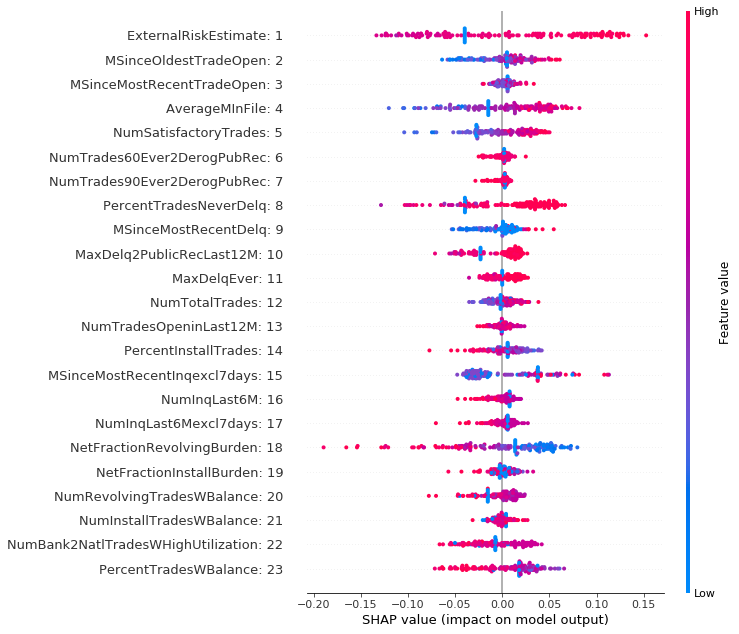

In [28]:
tree_explainer = shap.TreeExplainer(tree_model)
tree_shap_values = tree_explainer.shap_values(X_test_smaller)
shap.summary_plot(tree_shap_values[0], X_test_smaller, feature_names=feature_names, sort=False, max_display=23)

### Artificial neural network

Using TensorFlow backend.


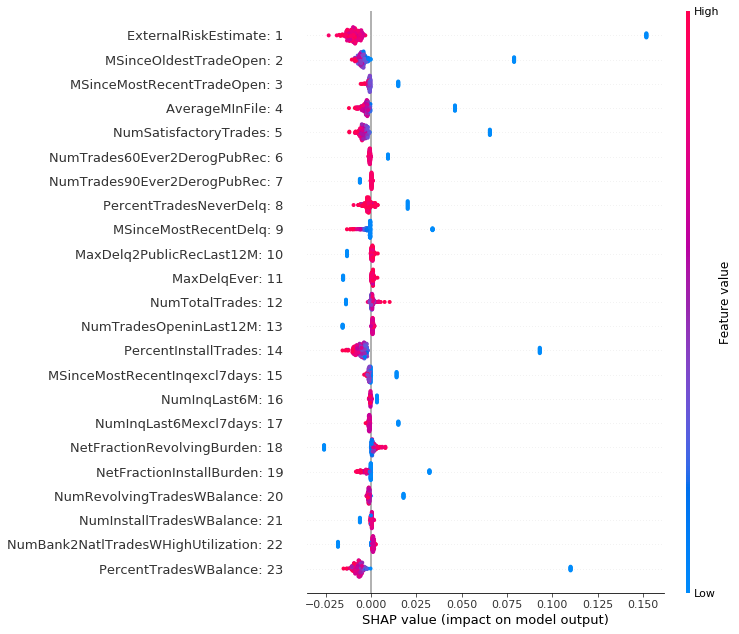

In [26]:
nn_explainer = shap.DeepExplainer(nn_model, X_test_smaller)
nn_shap_values = nn_explainer.shap_values(X_test_smaller)
shap.summary_plot(nn_shap_values[0], X_test_smaller, feature_names=feature_names, sort=False, max_display=23)

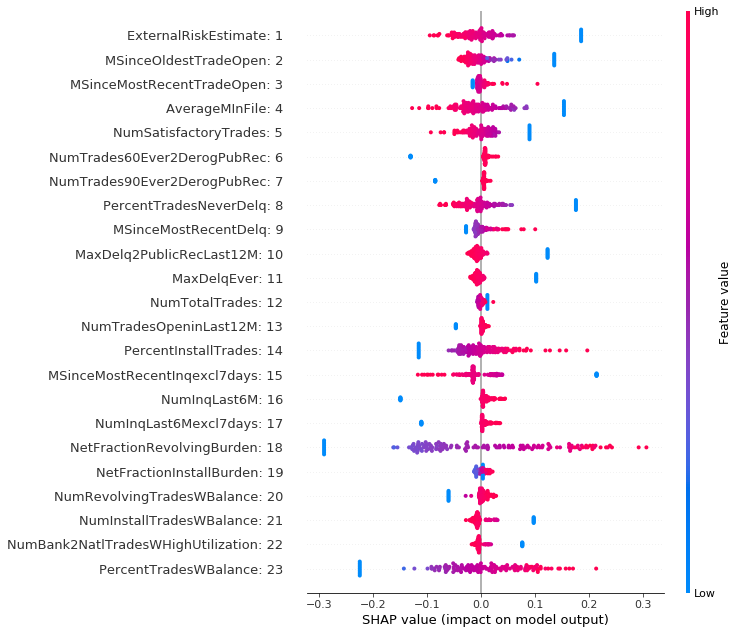

In [27]:
X_test_rorm_smaller = X_test_norm[:150]

nn_norm_explainer = shap.DeepExplainer(nn_model_norm, X_test_rorm_smaller)
nn_norm_shap_values = nn_norm_explainer.shap_values(X_test_rorm_smaller)
shap.summary_plot(nn_norm_shap_values[0], X_test_rorm_smaller, feature_names=feature_names, sort=False, max_display=23)

Publications/books:  
Dataset challange winner's solution: https://community.fico.com/s/blog-post/a5Q2E0000001czyUAA/fico1670  
Lime paper: https://arxiv.org/abs/1602.04938  
Shap paper: https://arxiv.org/abs/1705.07874  
Arguments against explainability of black box models: https://arxiv.org/abs/1811.10154  
Interpretability book: https://christophm.github.io/interpretable-ml-book/


Tutorials/articles:  
https://github.com/cog-data/ML_Interpretability_tutorial/blob/master/Machine_Learning_Interpretability_tutorial.ipynb  
https://towardsdatascience.com/one-feature-attribution-method-to-supposedly-rule-them-all-shapley-values-f3e04534983d 
https://towardsdatascience.com/interpreting-your-deep-learning-model-by-shap-e69be2b47893


https://www.kaggle.com/learn/machine-learning-explainability

https://towardsdatascience.com/explainable-artificial-intelligence-part-2-model-interpretation-strategies-75d4afa6b739
https://www.oreilly.com/ideas/interpreting-predictive-models-with-skater-unboxing-model-opacity - SKATER